In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
df_ma = yf.download('MA', start ='2025-01-23', end = '2025-01-24', interval="1m")
df_v = yf.download('V', start ='2025-01-23', end = '2025-01-24', interval="1m")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
df_ma.columns =['Close', 'High', 'Low', 'Open', 'Volume']
df_v.columns =['Close', 'High', 'Low', 'Open', 'Volume']

In [7]:
df_ma

,Close,High,Low,Open,Volume
Datetime,,,,,
2025-01-23 14:30:00+00:00,529.289978,529.547485,528.679993,529.049988,35132
2025-01-23 14:31:00+00:00,530.544983,530.599976,529.289978,529.289978,6671
2025-01-23 14:32:00+00:00,530.809998,530.809998,530.085022,530.390015,11135
2025-01-23 14:33:00+00:00,531.202515,531.202515,530.455017,530.799988,11137
2025-01-23 14:34:00+00:00,531.390198,532.269897,530.979980,531.200012,12381
...,...,...,...,...,...
2025-01-23 20:55:00+00:00,533.625000,533.760010,533.190002,533.195007,22861
2025-01-23 20:56:00+00:00,533.900024,533.900024,533.625000,533.760010,15616
2025-01-23 20:57:00+00:00,533.849976,534.059998,533.789978,533.885010,24900


In [9]:
combined_df = pd.concat([df_ma[['Open', 'Close']], df_v[['Open', 'Close']]], axis=1, keys=['MA', 'V'])
combined_df = combined_df.ffill()
combined_df.columns = ['MA_Open', 'MA_Close', 'V_Open', 'V_Close']

In [11]:
combined_df['MA_Return'] = combined_df.MA_Close.pct_change()
combined_df['V_Return'] = combined_df.V_Close.pct_change()

In [13]:
combined_df

,MA_Open,MA_Close,V_Open,V_Close,MA_Return,V_Return
Datetime,,,,,,
2025-01-23 14:30:00+00:00,529.049988,529.289978,323.760010,323.769989,NaN,NaN
2025-01-23 14:31:00+00:00,529.289978,530.544983,323.785004,323.859985,0.002371,0.000278
2025-01-23 14:32:00+00:00,530.390015,530.809998,323.950012,324.424988,0.000500,0.001745
2025-01-23 14:33:00+00:00,530.799988,531.202515,324.424988,324.630005,0.000739,0.000632
2025-01-23 14:34:00+00:00,531.200012,531.390198,324.690002,324.975006,0.000353,0.001063
...,...,...,...,...,...,...
2025-01-23 20:55:00+00:00,533.195007,533.625000,327.489990,327.795013,0.000639,0.000931
2025-01-23 20:56:00+00:00,533.760010,533.900024,327.799988,328.130005,0.000515,0.001022
2025-01-23 20:57:00+00:00,533.885010,533.849976,328.125000,328.100006,-0.000094,-0.000091


<Axes: xlabel='Datetime'>

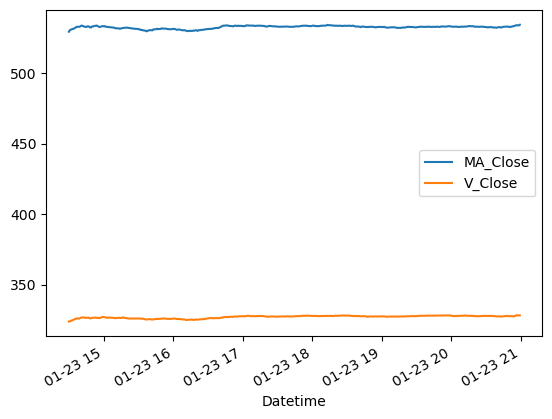

In [15]:
combined_df[['MA_Close', 'V_Close']].plot()

Text(0.5, 1.0, 'Spread between MA and V')

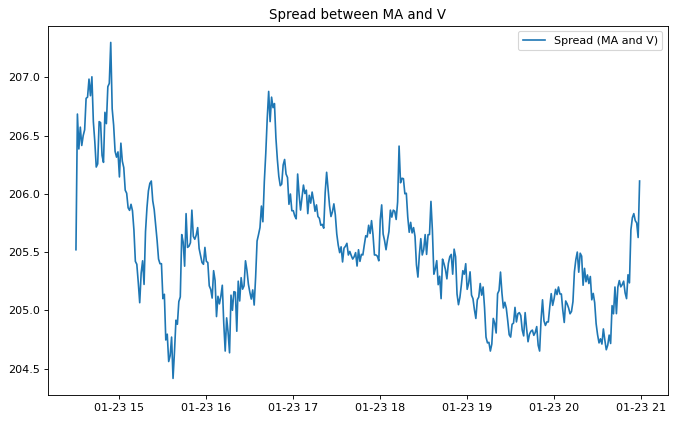

In [17]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(combined_df.MA_Close - combined_df.V_Close, label = 'Spread (MA and V)')
plt.legend()
plt.title("Spread between MA and V")

In [19]:
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.stattools import adfuller

In [20]:
p1 = combined_df['MA_Close']
p2 = combined_df['V_Close']

In [21]:
score, p_value, _ = coint(p1,p2)

In [22]:
p_value

0.19863007198735733

In [25]:
rho = combined_df['MA_Close'].corr(combined_df['V_Close'])

In [27]:
rho

0.8450185644768653

In [37]:
# Calculateing returns
data1 = combined_df.MA_Return
data2 = combined_df.V_Return

In [61]:
combined_df_returns = pd.concat([combined_df[['MA_Return']], combined_df[['V_Return']]], axis=1,).dropna()

In [63]:
combined_df_returns

,MA_Return,V_Return
Datetime,,
2025-01-23 14:31:00+00:00,0.002371,0.000278
2025-01-23 14:32:00+00:00,0.000500,0.001745
2025-01-23 14:33:00+00:00,0.000739,0.000632
2025-01-23 14:34:00+00:00,0.000353,0.001063
2025-01-23 14:35:00+00:00,0.000959,0.001308
...,...,...
2025-01-23 20:55:00+00:00,0.000639,0.000931
2025-01-23 20:56:00+00:00,0.000515,0.001022
2025-01-23 20:57:00+00:00,-0.000094,-0.000091


In [84]:
# Calculate correlation (ρ)
rho = combined_df_returns['MA_Return'].corr(combined_df_returns['V_Return'])

In [86]:
rho

0.5598723987931293

In [90]:
delta = 1

In [92]:
spread = combined_df.MA_Close - delta * combined_df.V_Close

In [94]:
spread

Datetime
2025-01-23 14:30:00+00:00    205.519989
2025-01-23 14:31:00+00:00    206.684998
2025-01-23 14:32:00+00:00    206.385010
2025-01-23 14:33:00+00:00    206.572510
2025-01-23 14:34:00+00:00    206.415192
                                ...    
2025-01-23 20:55:00+00:00    205.829987
2025-01-23 20:56:00+00:00    205.770020
2025-01-23 20:57:00+00:00    205.749969
2025-01-23 20:58:00+00:00    205.625000
2025-01-23 20:59:00+00:00    206.110016
Length: 389, dtype: float64

In [98]:
# Mu = d1_mean_spread
d1_mean_spread = np.mean(spread)

In [100]:
d1_mean_spread

205.50744597525707

In [102]:
current_spread = combined_df['MA_Close'].iloc[-1] - delta * combined_df['V_Close'].iloc[-1]

In [104]:
current_spread

206.11001586914062

In [106]:
d1_mean_spread - current_spread

-0.6025698938835546

In [112]:
mu = d1_mean_spread

In [114]:
mu

205.50744597525707

In [120]:
# Sigma = standard_deviation_spread
standard_deviation_spread = np.std(spread)

In [122]:
standard_deviation_spread

0.5452234987049952

In [128]:
sigma = standard_deviation_spread

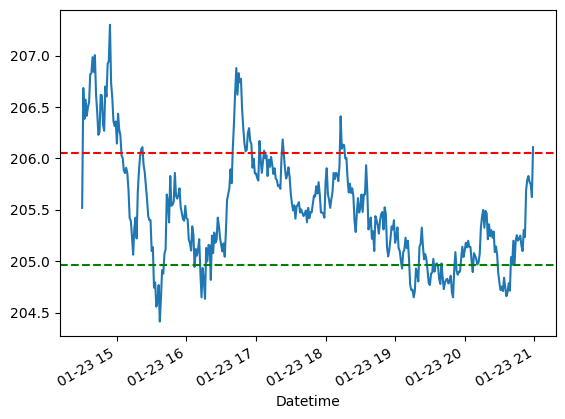

In [130]:
spread.plot()
plt.axhline(mu + sigma, color='r', linestyle='--', label=f"𝜇 + 𝜎 = {mu + sigma:.3f}")
plt.axhline(mu - sigma, color='g', linestyle='--', label=f"𝜇 - 𝜎 = {mu - sigma:.3f}")

In [136]:
import statsmodels.api as sm

In [137]:
# Run OLS regression to estimate the cointegration relationship
X = sm.add_constant(p2)  
model = sm.OLS(p1, X)
results = model.fit()

In [140]:
beta = results.params[1]

/var/folders/xc/tw7x6_8n0z30jr8_7fy3crgc0000gn/T/ipykernel_19254/387075550.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = results.params[1]


In [144]:
# Calculate the cointegration residual (Z)
Z = spread = combined_df.MA_Close - beta * combined_df.V_Close

<Axes: xlabel='Datetime'>

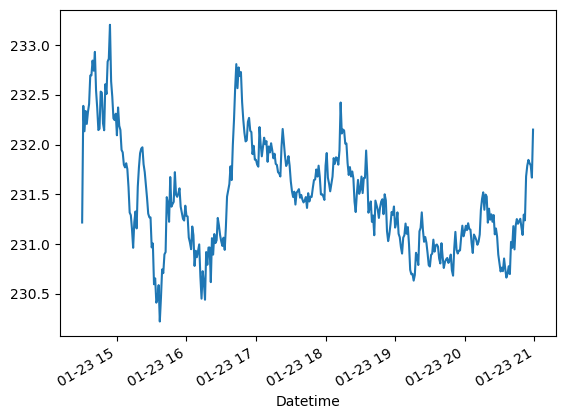

In [148]:
Z.plot()

In [33]:
# Calculate covariance and variance
covariance = data['MA_Returns'].cov(data['V_Returns'])  # Covariance of MA and V returns
variance = data['V_Returns'].var()  # Variance of V's returns

In [35]:
beta = covariance / variance

In [37]:
beta

0.5737154692050515